<a href="https://colab.research.google.com/github/macscheffer/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/LSDS2_123_Mac_Scheffer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make explanatory visualizations




Tody we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

In [1]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Objectives
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

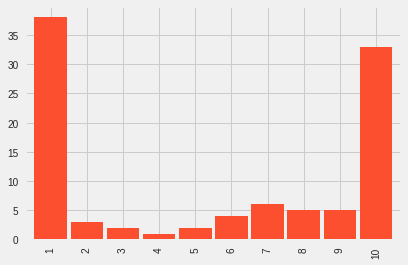

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

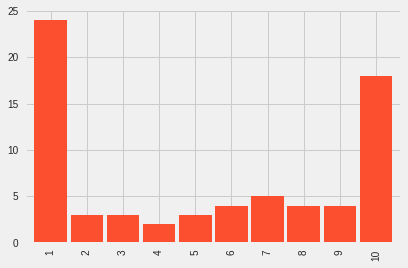

In [3]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

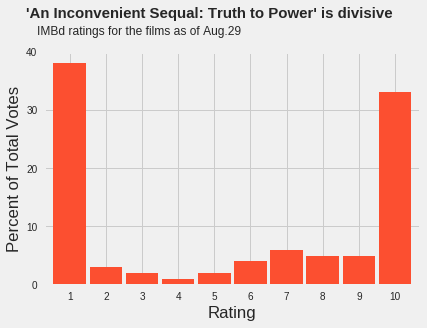

In [41]:
plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

ax = fake.plot.bar(color='C1', width=0.9)

ax.tick_params(labelrotation=0)

ax.text(x=-1.2, y=45.8, s="'An Inconvenient Sequal: Truth to Power' is divisive", fontsize= 15, fontweight='bold');
ax.text(x=-0.9, y=43, s='IMBd ratings for the films as of Aug.29',fontsize=12);

ax.set(xlabel='Rating', ylabel='Percent of Total Votes',
       yticks=range(0,50,10));


## Reproduce with real data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [68]:
df.shape

(80053, 26)

In [46]:
pd.options.display.max_columns = 500
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
df.sample().T

In [0]:
df.timestamp = pd.to_datetime(df.timestamp)

In [51]:
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [0]:
df = df.set_index('timestamp')
df.head()

In [0]:
df['2017-08-29']

In [0]:
df[df.category == 'IMDb users']

In [0]:
lastday = df['2017-08-29']

In [60]:
lastday[lastday.category == 'IMDb users'].tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
final = df.tail(1)

In [0]:
columns = [str(i) + '_pct' for i in range(1,11)]

In [0]:
data = final[columns].T

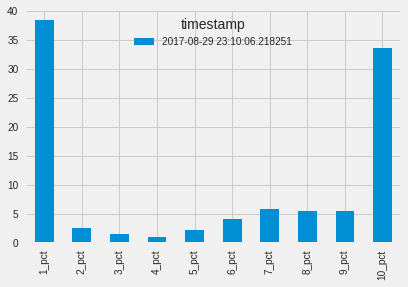

In [67]:
data.plot.bar();

In [0]:
data.index = range(1,11)

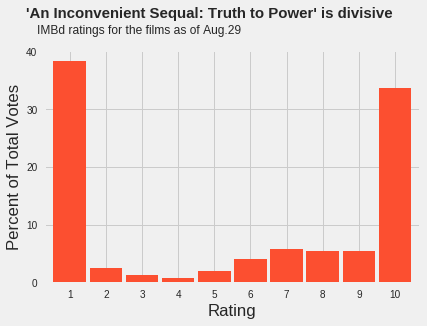

In [73]:
ax = data.plot.bar(color='C1', width=0.9, legend=False)

ax.tick_params(labelrotation=0)

ax.text(x=-1.2, y=45.8, s="'An Inconvenient Sequal: Truth to Power' is divisive", fontsize= 15, fontweight='bold');
ax.text(x=-0.9, y=43, s='IMBd ratings for the films as of Aug.29',fontsize=12);

ax.set(xlabel='Rating', ylabel='Percent of Total Votes',
       yticks=range(0,50,10));


# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

If you aren't sure what to choose, try:
- the chart titled ["Men dominated Al Gore's IMDb movie rating"](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)
- or the tutorial, [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

Other options include:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### Make more charts!

Choose a chart you want to make, from [FT's Visual Vocabulary poster](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!









In [0]:
candy = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv')

In [78]:
candy.shape

(85, 13)

In [79]:
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [0]:
candy.winpercent = candy.winpercent / 100

In [0]:
candy['chocolate_and_caramel'] = candy.chocolate + candy.caramel

In [86]:
candy[candy.chocolate == 1].winpercent.mean()

0.6092152940540541

In [87]:
candy[candy.caramel == 1].winpercent.mean()

0.5734690771428573

In [90]:
candy.pivot_table(index='chocolate_and_caramel', values='winpercent')

,winpercent
chocolate_and_caramel,
0,0.427440
1,0.559813
2,0.660766


In [0]:
mappings = {0:0, 1:0, 2:1}
candy.chocolate_and_caramel = candy.chocolate_and_caramel.map(mappings)

In [94]:
candy.pivot_table(index='chocolate_and_caramel', values='winpercent')

,winpercent
chocolate_and_caramel,
0,0.482154
1,0.660766


In [0]:
# i want to create my own little deck of cards library to help get an intuition for OOP

import random

In [0]:
class Card(object):
    def __init__(self, value, suit):
        self.value = value
        self.suit = suit
    def show(self):
        print('{} of {}'.format(self.value,self.suit))

class Deck(object):
    def __init__(self):
        self.cards = []
        self.build()
    
    def build(self):
        for s in ['spades','clubs','diamonds','hearts']:
            [self.cards.append(Card(v,s)) for v in range(1,14)]
    
    def show(self):
        [c.show() for c in self.cards]
    
    def shuffle(self):
        for i in range(len(self.cards)-1, 0, -1):
            r = random.randint(0,i)
            self.cards[i], self.cards[r] = self.cards[r], self.cards[i]
    
    def drawCard(self):
        return self.cards.pop()

class Player(object):

    def __init__(self, name):
        self.name = name
        self.hand = []
    
    def draw(self, deck):
        self.hand.append(deck.drawCard())
        return self   # return allows us to chain these draw methods.
    
    def showHand(self):
        [c.show() for c in self.hand]


In [0]:
deck = Deck()
mac = Player('mac')
deck.shuffle()

In [101]:
mac.draw(deck)

In [102]:
mac.draw(deck).draw(deck)

In [103]:
mac.showHand()

9 of spades
9 of clubs
4 of hearts


In [0]:
# could now make a blackjack game or something but this gave me a better intuition
